In [ ]:
## look to try gradient boosting 

## need to find naive model testing 

## 1 split cleaned data into test, 

## train and test model 

## ensemble learning ??


## figure out validation score 




In [1]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
import os 


# Read in our ramen data
all_homes_df= pd.read_csv("../Resources/Predictions_Resources/housing_b4_encoding.csv")
# Read in our ramen data
all_homes_df
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,Unnamed: 0,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,27322,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,...,85912.0,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0
17612,27323,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,...,35891.0,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0
17613,27324,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,...,124700.0,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0
17614,27326,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0


In [57]:

for column in all_homes_df.columns:
    print(f"column{column} has {all_homes_df[column].isnull().sum()} null values")

columnUnnamed: 0 has 0 null values
columnRegionID has 0 null values
columnSizeRank has 0 null values
columnRegionName has 0 null values
columnState has 0 null values
column2016-02-29 has 425 null values
column2016-03-31 has 416 null values
column2016-04-30 has 403 null values
column2016-05-31 has 382 null values
column2016-06-30 has 356 null values
column2016-07-31 has 342 null values
column2016-08-31 has 331 null values
column2016-09-30 has 319 null values
column2016-10-31 has 283 null values
column2016-11-30 has 268 null values
column2016-12-31 has 255 null values
column2017-01-31 has 220 null values
column2017-02-28 has 212 null values
column2017-03-31 has 198 null values
column2017-04-30 has 188 null values
column2017-05-31 has 164 null values
column2017-06-30 has 149 null values
column2017-07-31 has 135 null values
column2017-08-31 has 122 null values
column2017-09-30 has 106 null values
column2017-10-31 has 91 null values
column2017-11-30 has 82 null values
column2017-12-31 has 7

In [19]:
len(all_homes_df)

17616

In [2]:
all_homes_df.drop_duplicates(subset="RegionName",keep = "first", inplace = True)
len(all_homes_df)

17616

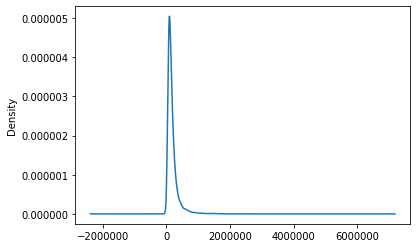

In [38]:
all_homes_df["2016-02-29"].plot.density()

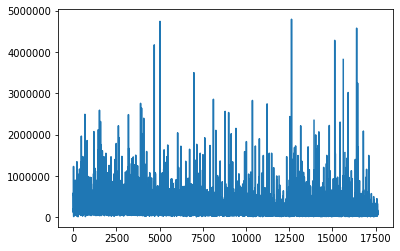

In [39]:
all_homes_df["2016-02-29"].plot((kind='hist',bins=100))

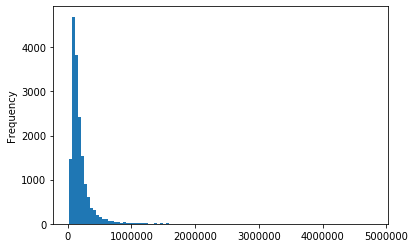

In [40]:
all_homes_df["2016-02-29"].plot(kind='hist',bins=100)

In [3]:
all_homes_df = all_homes_df.drop(columns="Unnamed: 0", axis =1)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,85912.0,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,35891.0,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,124700.0,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,77737.0,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0


In [31]:
all_homes_df["2016-02-29"].describe()

count    1.719100e+04
mean     1.909227e+05
std      2.145270e+05
min      1.258300e+04
25%      8.929350e+04
50%      1.367710e+05
75%      2.166985e+05
max      4.790310e+06
Name: 2016-02-29, dtype: float64

In [44]:
## run small city now to shrink data set again 
small_cty = all_homes_df.loc[(all_homes_df["2016-02-29"] < 90000)].index
small_cty

Int64Index([   22,    25,    49,    73,    90,   119,   129,   139,   152,
              181,
            ...
            17583, 17589, 17590, 17591, 17593, 17601, 17603, 17605, 17609,
            17614],
           dtype='int64', length=4380)

In [33]:
## can come back and remove small city from all city to see if that decreases tail in data 
len(small_cty)

4380

In [ ]:
#One hot states 

In [ ]:
# # factorize to map each category to a different interger
# states_cat = all_homes_df['State']
# states_cat_encoded, states_categories = states_cat.factorize()
# states_cat_encoded[:10]

In [4]:
# states_df
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
all_homes_df['states_Types_Cat'] = labelencoder.fit_transform(all_homes_df['State'])
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,states_Types_Cat
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0,34
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0,4
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0,43
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0,14
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,86201.0,86514.0,87365.0,87234.0,87160.0,86902.0,87095.0,87705.0,87924.0,38
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,36054.0,36024.0,36034.0,35844.0,36001.0,36098.0,36205.0,36059.0,35973.0,49
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,124903.0,125228.0,125531.0,125908.0,126784.0,127890.0,129247.0,129959.0,131079.0,32
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,78461.0,79138.0,79930.0,79683.0,79838.0,80272.0,80969.0,81871.0,82284.0,25


In [5]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(all_homes_df[['states_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
all_homes_df = all_homes_df.join(enc_df)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,41,42,43,44,45,46,47,48,49,50
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
states_cat_df= all_homes_df[["states_Types_Cat","State"]]
states_cat_df

,states_Types_Cat,State
0,34,NY
1,4,CA
2,43,TX
3,14,IL
4,43,TX
...,...,...
17611,38,PA
17612,49,WV
17613,32,NM
17614,25,MS


In [7]:
## removing types cat as onehot encoding is now done. 

all_homes_df.drop(columns="states_Types_Cat",inplace=True)
all_homes_df

,RegionID,SizeRank,RegionName,State,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,...,41,42,43,44,45,46,47,48,49,50
0,6181,0,New York,NY,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12447,1,Los Angeles,CA,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39051,2,Houston,TX,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17426,3,Chicago,IL,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6915,4,San Antonio,TX,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17541,29449,Columbus Township,PA,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,20076,29449,Pursglove,WV,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,43205,29449,Tome,NM,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,51821,29449,Eastabuchie,MS,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## creating and removing name columns to feed into KNN imputer 

name_columns= all_homes_df[['RegionID', 'SizeRank', 'RegionName', 'State']]
print(type(name_columns))

<class 'pandas.core.frame.DataFrame'>


In [9]:
## pring name columns to be attached back later 
all_homes_df = all_homes_df.drop(name_columns, axis =1)
all_homes_df

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,87588.0,87114.0,86249.0,85047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,107167.0,107765.0,109617.0,110413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,65800.0,65968.0,65759.0,65821.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# columns = all_homes_df.columns.tolist()
# columns

In [ ]:
## use KNN imputer 

In [10]:
from sklearn.impute import KNNImputer
KNN = KNNImputer()
KNN.fit(all_homes_df)

KNNImputer()

In [11]:
X = KNN.transform(all_homes_df)

In [12]:
num_housing_df_transformed = pd.DataFrame(X, columns = all_homes_df.columns)
num_housing_df_transformed

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,91814.0,91475.0,90859.0,90279.0,89396.0,88568.0,87588.0,87114.0,86249.0,85047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17612,36601.8,36675.4,36782.4,36873.6,36797.8,36778.2,36684.4,36786.2,36844.2,36984.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17613,102609.0,103567.0,103141.0,103043.0,104028.0,105183.0,107167.0,107765.0,109617.0,110413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17614,66270.0,66382.0,66372.0,66543.0,66025.0,65840.0,65800.0,65968.0,65759.0,65821.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Define features set -- using 2020-03 as y for now 
X = num_housing_df_transformed.copy()
X = X.drop("2020-03-31", axis=1)
X.head()

,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,41,42,43,44,45,46,47,48,49,50
0,551506.0,553832.0,557083.0,560110.0,563034.0,565721.0,568673.0,571806.0,574748.0,577918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,591562.0,593862.0,600103.0,604219.0,608947.0,611310.0,615416.0,620355.0,625774.0,628777.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,162316.0,162904.0,162970.0,163390.0,164033.0,165015.0,165519.0,166004.0,166277.0,167231.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217645.0,219082.0,220163.0,220675.0,221501.0,222768.0,223935.0,224813.0,226072.0,227726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150402.0,151045.0,152099.0,153591.0,154631.0,155071.0,155328.0,155861.0,156324.0,157268.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Define target vector y 
y = num_housing_df_transformed["2020-03-31"].values.reshape(-1, 1)
print(y[:5])
print(y.shape)
print(type(y))

[[652307.]
 [752508.]
 [191907.]
 [249152.]
 [187718.]]
(17616, 1)
<class 'numpy.ndarray'>


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## standard scaling not done here , see how it goes and adjust 

In [25]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
X_train_scaled[:5]

array([[-2.77657461e-01, -2.80200670e-01, -2.82704014e-01,
        -2.82406947e-01, -2.80526962e-01, -2.84617347e-01,
        -2.91267508e-01, -2.98522524e-01, -2.99844437e-01,
        -3.00802106e-01, -3.01690490e-01, -3.03412690e-01,
        -3.02125497e-01, -2.97181064e-01, -2.90808341e-01,
        -2.87867439e-01, -2.87699926e-01, -2.86571951e-01,
        -2.84978628e-01, -2.83458960e-01, -2.85124027e-01,
        -2.84587529e-01, -2.81156860e-01, -2.77444617e-01,
        -2.73818348e-01, -2.74640030e-01, -2.76620127e-01,
        -2.78500959e-01, -2.76956461e-01, -2.71666782e-01,
        -2.66790550e-01, -2.64071774e-01, -2.60853681e-01,
        -2.59538246e-01, -2.58975672e-01, -2.58486385e-01,
        -2.59539478e-01, -2.58912684e-01, -2.59748230e-01,
        -2.57993761e-01, -2.58200500e-01, -2.60925316e-01,
        -2.63247345e-01, -2.63831396e-01, -2.64276362e-01,
        -2.64397659e-01, -2.65367712e-01, -2.66403887e-01,
        -2.66878315e-01, -5.00398202e-02, -1.44027785e-0

In [130]:
## fitting x and y to initial linear regression model 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse=np.sqrt(lin_mse)
print("mse :",lin_mse)
print("rmse :",lin_rmse)

from sklearn.metrics import mean_absolute_error
lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

mse : 42215.597635288854
rmse : 205.4643463846924
MAE : 44.6446409095408


In [163]:
lin_reg.intercept_,lin_reg.coef_

(array([-2.88641883]),
 array([[-3.74707111e-03,  2.06587962e-02,  1.62645169e-02,
         -7.68174466e-02,  5.37510438e-02,  4.74768304e-03,
         -2.61734863e-02,  1.63902043e-02, -1.37377308e-02,
         -2.30672232e-02,  2.77162661e-02, -1.10546651e-01,
          2.63783467e-01, -1.00793960e-01,  2.23294960e-02,
         -1.50245064e-01,  4.93414407e-02,  5.52682947e-02,
         -7.78204748e-03, -6.10147785e-02,  9.68760236e-03,
          4.67155954e-03, -3.42061573e-02, -2.21297247e-01,
          7.20584127e-01, -3.90510225e-01,  8.01773064e-02,
         -2.37386068e-01,  3.07107609e-02,  1.11892467e-01,
          3.36058794e-02, -1.45800888e-01, -2.27447865e-02,
          1.27926493e-01, -1.09791511e-01, -4.09375032e-01,
          1.27947290e+00, -6.93550938e-01,  6.90659071e-02,
         -2.59452827e-01, -9.61159971e-03,  8.90597545e-02,
          1.15801318e-01, -2.32665258e-01, -7.42171693e-02,
          2.53043461e-01, -2.18479125e-01, -6.21897933e-01,
          1.79892

In [ ]:
## try polynomial lin reg 

In [141]:
from sklearn.ensemble import RandomForestRegressor
## start with 3 trees 
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [142]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

## rmse = 58 k with 3 decisions and 10 trees 

mse : 3414401684.7462897
rmse : 58432.88187952302
MAE : 23074.390576098867


## trying 100 trees insead of 10 which doesnt work very well 

In [143]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=4)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [144]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

lin_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",lin_MAE)

## 4 trees almost cuts rmse in half, 

mse : 828040238.0234927
rmse : 28775.688315372972
MAE : 9062.398027280395


In [145]:
## increasing amount of trees to 100

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [146]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

#3k improvement in SMSE 1.5k in MAE 

mse : 662461623.6381931
rmse : 25738.329853317857
MAE : 7548.925705923826


In [147]:
## increasing depth to 6

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [148]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

## decrease in RMSE and MAE with 6 instead of 4 depth 

mse : 383186114.454354
rmse : 19575.140215445557
MAE : 2169.9256309669604


In [ ]:
## RMSE continues to drop as tree depth increases 

In [149]:
## seeing if 10 depth creates over fitting and increase in rmse and MAE 
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [150]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

## rmse finally went up but MAE went down , will try 8 depth 

mse : 401502871.77948827
rmse : 20037.536569635708
MAE : 1541.609822556365


In [151]:
## seeing if 8 depth doesnt overfit as much as 10  
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)


## 8 trees gets rmse below 20 k and MAEi sup from 10 trees 

mse : 373374472.1222134
rmse : 19322.90019956149
MAE : 1686.5745697842697


In [153]:
## going to try larger amound of trees 
forest_reg = RandomForestRegressor(n_estimators=300, random_state=42, max_depth=8)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
forest_mse = mean_squared_error(y_test,y_pred)
forest_rmse=np.sqrt(forest_mse)
print("mse :",forest_mse)
print("rmse :",forest_rmse)

forest_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",forest_MAE)

## over fitting seen as rmse goes back up at this many trees, will try gradient boosting for 8 depth to try to beat
## the lin reg model 

mse : 380087334.0470102
rmse : 19495.82863196664
MAE : 1683.302150178498


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(X_train,y_train)


/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#              learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
#              max_leaf_nodes=None, min_impurity_decrease=0.0,
#              min_impurity_split=None, min_samples_leaf=1,
#              min_samples_split=2, min_weight_fraction_leaf=0.0,
#              n_estimators=3, n_iter_no_change=None, presort='auto',
#              random_state=42, subsample=1.0, tol=0.0001,
#              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# from sklearn.tree import <SomeDecisionTreeClass>
# from sklearn import tree
# model = <SomeDecisionTree>()
# model.fit(X, y)
# dot_data = tree.export_graphviz(model, 
#                   feature_names=<list of feature names>,  
#                   class_names=<list of class names>,  
#                   filled=True, rounded=True,  
#                   special_characters=True,
#                    out_file=None,
#                            )
# graph = graphviz.Source(dot_data)
# graph

In [89]:
errors = [mean_squared_error(y_test,y_pred)
         for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)+1
#np.argmin = Returns the indices of the minimum values along an axis. so just add one to the index of the amount of 
# estimators that are thought to be the right mount 

In [90]:
bst_n_estimators

## initially 118 came out and I started with 120, will up to 200 and rerun 
#error to see what the best estimator changes

## got 199 this time so I assme over fitting will give it a try and probably need to swtich to warm start 

199

In [92]:
gbrt_best = GradientBoostingRegressor(max_depth=4,n_estimators=bst_n_estimators,learning_rate=0.1, random_state=42,
                                     subsample=0.25)
gbrt_best.fit(X_train,y_train)


/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4, n_estimators=199, random_state=42,
                          subsample=0.25)

In [101]:
from sklearn.metrics import mean_squared_error

y_pred =gbrt_best.predict(X_test)
##

## root mean squre error the system typrically makes in its predictions, higher for more error, this is in dollars 
## as our data is in dollars, RMSE = about 17K from initial gradient boosting method. 
gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)

mse : 285406932.67583275
rmse : 16893.99102272263


In [100]:
## checking Mean absolute error due to there being lots out outliers in this data set. 

from sklearn.metrics import mean_absolute_error
gbrt_MAE = mean_absolute_error(y_test,y_pred)
gbrt_MAE

2150.0279639811433

In [97]:
##root mean square error is 16 thousand at this point which is best model yet 
y_pred



array([489498.88946663, 206908.78946156, 192983.56962177, ...,
       108380.7383735 , 187076.65625104, 358100.77811198])

## trying 300 trees in forest 

In [102]:
## trying 300 trees in forest 

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1, random_state=42)
gbrt.fit(X_train,y_train)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)

In [103]:
errors = [mean_squared_error(y_test,y_pred)
         for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)+1
bst_n_estimators

300

In [118]:
## run again with bst estimators which is still 300 
gbrt_best = GradientBoostingRegressor(max_depth=4,n_estimators=bst_n_estimators,learning_rate=0.1, random_state=42,
                                     subsample=0.25)
gbrt_best.fit(X_train,y_train)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42,
                          subsample=0.25)

In [106]:
from sklearn.metrics import mean_squared_error

y_pred =gbrt_best.predict(X_test)
##

## root mean squre error the system typrically makes in its predictions, higher for more error, this is in dollars 
## as our data is in dollars, RMSE = about 17K from initial gradient boosting method. 
gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)

mse : 281953988.98486906
rmse : 16791.48560982229


In [107]:
## rmse only went down by 100 when 300 trees were added. 
from sklearn.metrics import mean_absolute_error
gbrt_MAE = mean_absolute_error(y_test,y_pred)
gbrt_MAE

## Mean absolue error went down by 30, small change from increase in trees. 

2120.2647509847725

In [111]:
## completing 95% condifence interval for the generalization error 
from scipy import stats


confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

## something wrong and getting every number instiead of average between thr 95% interval 

array([[345860.57576761, 341253.89432592, 341010.82007882, ...,
        339505.12070993, 340907.2935985 , 343797.09391881],
       [406095.05057896, 409973.78889684, 410175.99706005, ...,
        411423.14104431, 410262.04448667, 407843.45794436]])

In [112]:
## t score 
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(328725.4207474708, 420086.0932349854)

In [113]:
## z score 

zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(328739.7226759194, 420074.9013092715)

In [155]:

## try warm start to keep trees as loop works through more trees until validation error does not improve 

gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [156]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)


 number of estimators : 170
Minimum validation MSE: 219729959.48802862
mse : 219730380.2369343
rmse : 14823.305307418259
MAE : 1317.9510524955974


In [157]:
## forgot learning rate above going to try it again 

gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42,learning_rate=0.01)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [158]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)


 number of estimators : 170
Minimum validation MSE: 219729959.48802862
mse : 219730380.2369343
rmse : 14823.305307418259
MAE : 1317.9510524955974


In [159]:
## forgot learning rate above going to try it again 
# adding quarter data sub sample to add stocastic GB 

gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42,learning_rate=0.1,subsample=0.25)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [160]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)
## dropping stocastic increased RMSE 

## only 77 trees were used before it was cut off so stocastic is hurting bias a lot 

 number of estimators : 77
Minimum validation MSE: 442661542.73695856
mse : 448480225.7371045
rmse : 21177.35171680124
MAE : 1717.7872739677337


In [161]:
## lowering learning rate to 0.01 and using SBG = .25


gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42,learning_rate=0.01,subsample=0.25)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [162]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)

#lowering learning rate and stocastic got worse not better , used all tress available, would probably need much larger
## amount of threes to lower learning rate, not finidings its way past local minimums need to keep LR up 

 number of estimators : 299
Minimum validation MSE: 951014636.6084623
mse : 951014636.6084623
rmse : 30838.525201579636
MAE : 7137.210716558406


In [ ]:
## maybe try quadric regression if cant get RF to drop into the 100's 

In [119]:

## try warm start to keep trees as loop works through more trees until validation error does not improve 

gbrt = GradientBoostingRegressor(max_depth=4, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 200):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [120]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)

 number of estimators : 126
Minimum validation MSE: 210256569.5587282
mse : 210266185.166891
rmse : 14500.55809846266


In [122]:
16791- 14500

2291

In [ ]:
RMSE of 14500 improvement of 2291 from rmse : 16791.48560982229 from non warm start method 

In [121]:
gbrt_MAE = mean_absolute_error(y_test,y_pred)
gbrt_MAE

1761.5890025548395

In [123]:
2120.-1761

## improvement of 359 in MAE score with warm start 

359.0

In [117]:
len(y_pred)

4404

In [ ]:
## to create final predictions data table 

final_predictions_df= pd.DataFrame(final_predictions)